In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

plt.style.use('seaborn-pastel')

In [ ]:
cols = ['dt_nasc_g', 'logradouro_g', 'bairro_g', 'municipio_residencia_g',
       'houve_internacao_s', 'dt_recebimento_g', 'dt_liberacao_g',
       'resultado_g', 'suporte_ventilatorio_s', 'classif_gestante_s',
       'sint_febre_s', 'sint_tosse_s', 'sint_dor_garganta_s',
       'sint_dispneia_s', 'sint_desconforto_respiratorio_s',
       'sint_saturacao_s', 'sint_diarreia_s', 'sint_vomito_s', 'sint_outros_s',
       'comorb_diabetes_s', 'comorb_cardiopatia_s', 'profissional_de_saude_e',
       'sexo_e', 'estado_e', 'evolucao_caso_e', 'uti_o', 'dt_obito_o',
       'hospitalizacao_o', 'contatos_suspeitos_o', 'contatos_confirmados_o', 'tipo_teste_e']

In [ ]:
df = pd.read_csv( 'datasets/cleaned_base_integracao.csv', usecols=cols)
df[cols]

df.drop( df[ df['resultado_g'] == 'Inconclusivo' ].index, inplace=True )
df.drop( df[ df['resultado_g'] == 'Aguardando Resultado' ].index, inplace=True )

In [ ]:
df.head()

,dt_nasc_g,logradouro_g,bairro_g,municipio_residencia_g,houve_internacao_s,dt_recebimento_g,dt_liberacao_g,resultado_g,suporte_ventilatorio_s,classif_gestante_s,sint_febre_s,sint_tosse_s,sint_dor_garganta_s,sint_dispneia_s,sint_desconforto_respiratorio_s,sint_saturacao_s,sint_diarreia_s,sint_vomito_s,sint_outros_s,comorb_diabetes_s,comorb_cardiopatia_s,profissional_de_saude_e,sexo_e,estado_e,tipo_teste_e,evolucao_caso_e,uti_o,dt_obito_o,hospitalizacao_o,contatos_suspeitos_o,contatos_confirmados_o
0,1984-03-14,RUI BARBOSA,NaN,FORTALEZA,NaN,2020-02-26,2020-05-30 12:12:28,Não Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-02-06,NaN,NaN,FORTALEZA,NaN,2020-02-28,2020-08-03 17:38:50,Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,CEARÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-08-14,RUA PADRE VALDEVINO,ALDEOTA,FORTALEZA,NaN,2020-03-02,2020-05-30 13:12:51,Não Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Masculino,CEARÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-12-23,RUA PADRE VALDEVINO,ALDEOTA,FORTALEZA,NaN,2020-03-02,2020-05-30 13:12:50,Não Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feminino,CEARÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1977-05-04,RUA: 8,PASSARE,FORTALEZA,NaN,2020-03-05,2020-06-10 17:09:41,Não Detectável,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feminino,CEARÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(158566, 30)

# Recebimento e Liberação de pacientes

In [ ]:
recebimento = df['dt_recebimento_g'].astype('datetime64')
liberado = df['dt_liberacao_g'].astype('datetime64')

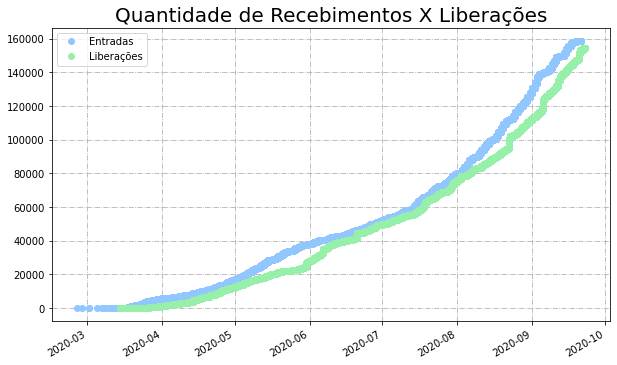

In [ ]:
import random

fig = plt.figure()
ax = fig.add_subplot(111)

entrada = date2num( recebimento.sort_values() )
y = [i+random.gauss(0,1) for i,_ in enumerate(entrada)]
p1 = ax.plot_date( entrada, y )

saida = date2num( liberado.sort_values() )
y = [i+random.gauss(0,1) for i,_ in enumerate(saida)]
p2 = ax.plot_date( saida, y )

plt.legend( (p1[0], p2[0]), ('Entradas', 'Liberações') )

plt.title('Quantidade de Recebimentos X Liberações', size=20)

plt.rcParams['figure.figsize'] = 12, 10
plt.grid(zorder=0, linestyle='-.')
plt.gcf().autofmt_xdate()

plt.savefig('recebimento_liberacoes.png')

# Sexo dos pacientes

In [ ]:
f = len( df[ (df['resultado_g'] == 'Detectável') & (df['sexo_e'] == 'Feminino') ] )
m = len( df[ (df['resultado_g'] == 'Detectável') & (df['sexo_e'] == 'Masculino') ] )

_f = len( df[ (df['resultado_g'] == 'Não Detectável') & (df['sexo_e'] == 'Feminino') ] )
_m = len( df[ (df['resultado_g'] == 'Não Detectável') & (df['sexo_e'] == 'Masculino') ] )

print( f'Casos em homes: {m} \nCasos em Mulheres {f}')
print( f'Casos não detectados em homes: {_m} \nCasos não detectados em Mulheres {_f}')

Casos em homes: 17701 
Casos em Mulheres 20133
Casos não detectados em homes: 28461 
Casos não detectados em Mulheres 37927


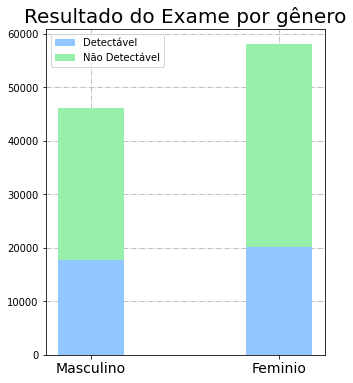

In [ ]:
ind = np.arange(2)
width = 0.35

detectados = (m, f)
n_detectados = (_m, _f)

p1  = plt.bar( ind, detectados, width, zorder=3 )
p2  = plt.bar( ind, n_detectados, width, bottom=detectados, zorder=3 )

plt.rcParams['figure.figsize'] = 5, 6
plt.grid(zorder=0, linestyle='-.')

plt.title('Resultado do Exame por gênero', size=20)
plt.xticks( ind, ('Masculino', 'Feminio'), size=14 )
plt.legend((p1[0], p2[0]), ('Detectável', 'Não Detectável'))

plt.savefig('resultado_por_genero.png')

# Resultados do exame

In [ ]:
detectados = len( df[ df['resultado_g'] == 'Detectável' ] )
n_detectados = len( df[ df['resultado_g'] == 'Não Detectável' ] )

print( detectados, n_detectados)

47727 110839


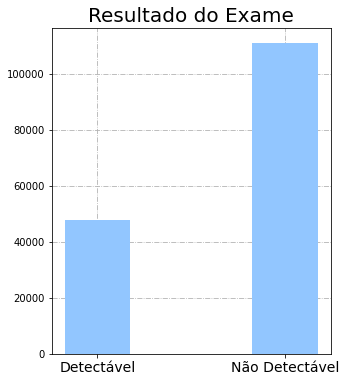

In [ ]:
ind = np.arange(2)
width = 0.35

bars = (detectados, n_detectados)

plt.bar( ind, bars, width, zorder=3 )

plt.rcParams['figure.figsize'] = 5, 6
plt.grid( zorder=0, linestyle='-.')

plt.title('Resultado do Exame', size=20)
plt.xticks( ind, ('Detectável', 'Não Detectável'), size=14 )
# plt.legend((p1[0], p2[0]), ('Detectável', 'Não Detectável'))

plt.savefig('resultados.png')

# Tipo de teste

In [ ]:
labels = df.groupby('tipo_teste_e').groups.keys()
values = []

for x in labels:
  cont = len( df[ df['tipo_teste_e'] == x ] )
  values.append( cont )
  print( f'{x}: {cont}' )

values = tuple(values)
labels = ['ELISA IgM', 'ELISA', 'ECLIA Ig6', 'ECLIA', 'CLIA', 'RT-PCR', 'TR-ANTICORPO', 'TR-ANTÍGENO']

Enzimaimunoensaio - ELISA IgM: 15
Enzimaimunoensaio – ELISA: 6
Imunoensaio por Eletroquimioluminescência - ECLIA IgG: 28
Imunoensaio por Eletroquimioluminescência – ECLIA: 13
Quimioluminescência - CLIA: 25
RT-PCR: 60289
TESTE RÁPIDO - ANTICORPO: 14090
TESTE RÁPIDO - ANTÍGENO: 269


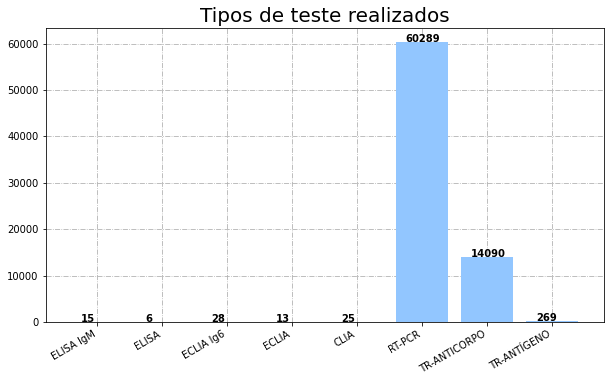

In [ ]:
ind = np.arange( len(labels) )
width = .8

plt.rcParams['figure.figsize'] = 10, 6
plt.grid( zorder=0, linestyle='-.')

plt.bar( ind, values, width, zorder=3 )
plt.xticks( ind, labels )

for i, v in enumerate(values):
  plt.text( i-.25, v, str(v), color='black', fontweight='bold' )

plt.title('Tipos de teste realizados', size=20)
plt.gcf().autofmt_xdate()

plt.savefig('tipos_de_teste.png')

# Idade dos pacientes

In [ ]:
slice_df = df[ df['resultado_g'] == 'Detectável' ]

now = pd.to_datetime('now')
nascimento = slice_df['dt_nasc_g'].astype('datetime64')
idades = (now.year - nascimento.dt.year) - ( (now.month - nascimento.dt.month) < 0)
idades = idades.to_frame()

In [ ]:
idades

,dt_nasc_g
1,23
17,28
18,57
19,25
22,60
...,...
162432,80
162433,63
162434,63
162436,55


In [ ]:
def circle_plot(data, title='graph'):
    total = sum(data.values())

    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

    fig1, ax1 = plt.subplots()

    plt.pie(data.values(), labels=data.keys(), colors=colors, autopct='%1.1f%%', 
            startangle=90, pctdistance=0.85)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.set_facecolor('white')
    ax1.axis('equal') 
    plt.title(title, fontdict={'fontsize': 'xx-large'})
    plt.tight_layout()
    plt.savefig('idades.png')

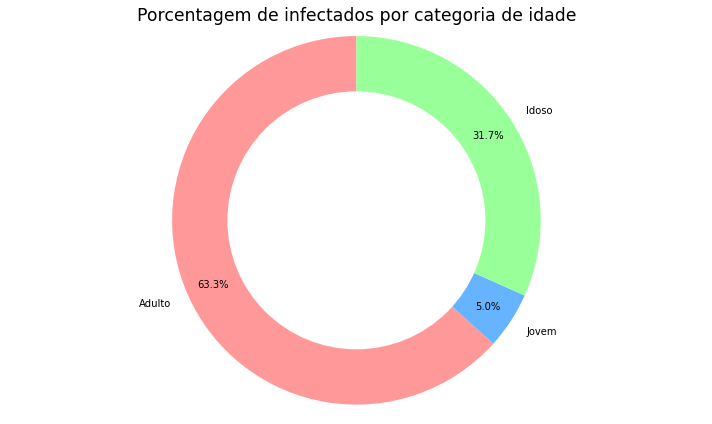

In [ ]:
data = {}
data['Adulto'] = len( idades[ (idades['dt_nasc_g'] > 18) & (idades['dt_nasc_g'] < 60) ] ) 
data['Jovem'] =  len( idades[ idades['dt_nasc_g'] < 18 ] )
data['Idoso'] = len( idades[ idades['dt_nasc_g'] > 60 ] )

circle_plot(data, 'Porcentagem de infectados por categoria de idade')